# get csv in google colab

In [ ]:
#get csv in google colab

#method 1
#click on the 'Files' icon on the left side of the page,
#choose upload to a session storage
#upload "hotel_bookings.csv" in "content" file

from google.colab import drive
path = '/content/hotel_bookings.csv'

import pandas as pd
data = pd.read_csv(path)

display(data)

FileNotFoundError: [Errno 2] No such file or directory: '/content/hotel_bookings.csv'

In [ ]:
#method 2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Linear regreesion

In [ ]:
# linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


display(data.shape, data.head(), data.describe())

# checking for null values
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

# filling null values with zero
data.fillna(0, inplace = True)

# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
data[filter]

data = data[~filter]
data

# drop country
useless_col = ['country']
data.drop(useless_col, axis = 1, inplace = True)

# creating numerical and categorical dataframes
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

cat_df = data[cat_cols]
cat_df.head()

cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'], format='mixed')

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

cat_df.head()

# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})
cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})
cat_df['reservation_status'] = cat_df['reservation_status'].map({'Check-Out': 0, 'Canceled': 1, 'No-Show': 2})
cat_df['assigned_room_type'] = cat_df['assigned_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'I': 6,
                                                                   'B': 7, 'H': 8, 'L': 9, 'K': 10})


num_df = data.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

num_df.var()

# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

num_df.var()

num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

num_df.head()

X = pd.concat([cat_df, num_df], axis = 1)
y = data['is_canceled']

X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

lm1 = LinearRegression().fit(X_train, y_train)
print("lm1 intercept(w0): ", lm1.intercept_)
print("lm1 coefficients (w1,w2,w3): ", lm1.coef_)
print("lm1 features: ", lm1.feature_names_in_)

from sklearn.metrics import mean_squared_error, r2_score
train_pred = lm1.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
r2 = r2_score(y_train, train_pred)

print("lm1 Train MSE: {:.3f}".format(mse))
print("lm1 Train R2: {:.2%}".format(r2))

test_pred1 = lm1.predict(X_test)
print("lm1 Test MSE: {:.3f}".format(mean_squared_error(y_test, test_pred1)))
print("lm1 Test R2: {:.2%}".format(r2_score(y_test, test_pred1)))




(119390, 32)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

assigned_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

reservation_status: 
['Check-Out' 'Canceled' 'No-Show']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]

lm1 intercept(w0):  -87.90592672891839
lm1 coefficients (w1,w2,w3):  [-8.48246801e-03  6.20611017e-04 -1.27775701e-03  8.07535734e-03
  4.17265772e-03 -3.74521043e-03  1.48470366e-02 -5.54245694e-03
  8.99671768e-01 -3.02202823e-02 -3.873

reservation_status
0    75011
1    42993
2     1206
Name: count, dtype: int64


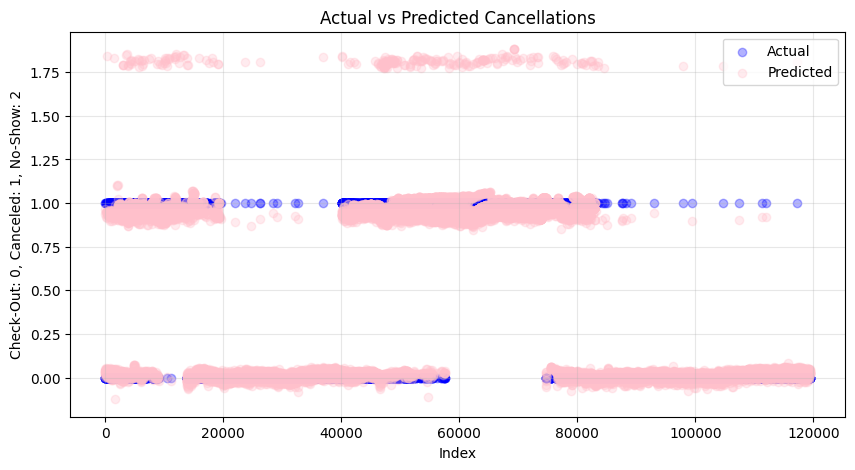

In [ ]:
# Since there is only a few no-show data, they are not on the graph
print(cat_df['reservation_status'].value_counts())



plt.figure(figsize=(10, 5))

# plot actual
plt.scatter(X_test.index, y_test, color='blue', alpha=0.3, label='Actual')

# plot predicted
plt.scatter(X_test.index, test_pred1, color='pink', alpha=0.3, label='Predicted')

plt.xlabel('Index')
plt.ylabel('Check-Out: 0, Canceled: 1, No-Show: 2')
plt.title('Actual vs Predicted Cancellations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Decision Tree


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Load the hotel bookings data
path = '/content/hotel_bookings.csv'
data = pd.read_csv(path)

# Target variable
y = data['is_canceled']

# Function to calculate entropy
def calculate_entropy(y):
    if len(y) == 0:
        return 0
    probabilities = y.value_counts(normalize=True)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calculate entropy for the parent node
parent_entropy = calculate_entropy(y)
print(f'Entropy of the parent node: {parent_entropy}')

# Example feature to split on (choose a relevant feature)
feature = 'hotel'  # Replace with an actual feature like 'gillcolor' if available

# Function to calculate child entropies
def calculate_child_entropy(data, feature, target):
    child_entropies = {}
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        child_entropy = calculate_entropy(subset[target])
        child_entropies[value] = child_entropy
    return child_entropies

# Calculate entropy for child nodes
child_entropies = calculate_child_entropy(data, feature, 'is_canceled')
print(f'Child Entropies:\n{child_entropies}')

# Calculate information gain
def calculate_information_gain(parent_entropy, child_entropies, data, feature):
    total_instances = len(data)
    weighted_child_entropy = sum(
        (len(data[data[feature] == value]) / total_instances) * child_entropy
        for value, child_entropy in child_entropies.items()
    )
    information_gain = parent_entropy - weighted_child_entropy
    return information_gain

# Calculate information gain for the feature
information_gain = calculate_information_gain(parent_entropy, child_entropies, data, feature)
print(f'Information Gain for {feature}: {information_gain}')

# Preprocess the data
data['hotel'] = data['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})
X = data.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date'])
y = data['is_canceled']
X = pd.get_dummies(X, drop_first=True)

# Step 2: Modeling

# 2.1 Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.2 Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 2.3 Visualize the Original Model
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'], filled=True)
plt.title('Original Decision Tree Visualization')
plt.show()

# 2.4 Apply and Evaluate the Model
y_pred = model.predict(X_test)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: '/content/hotel_bookings.csv'

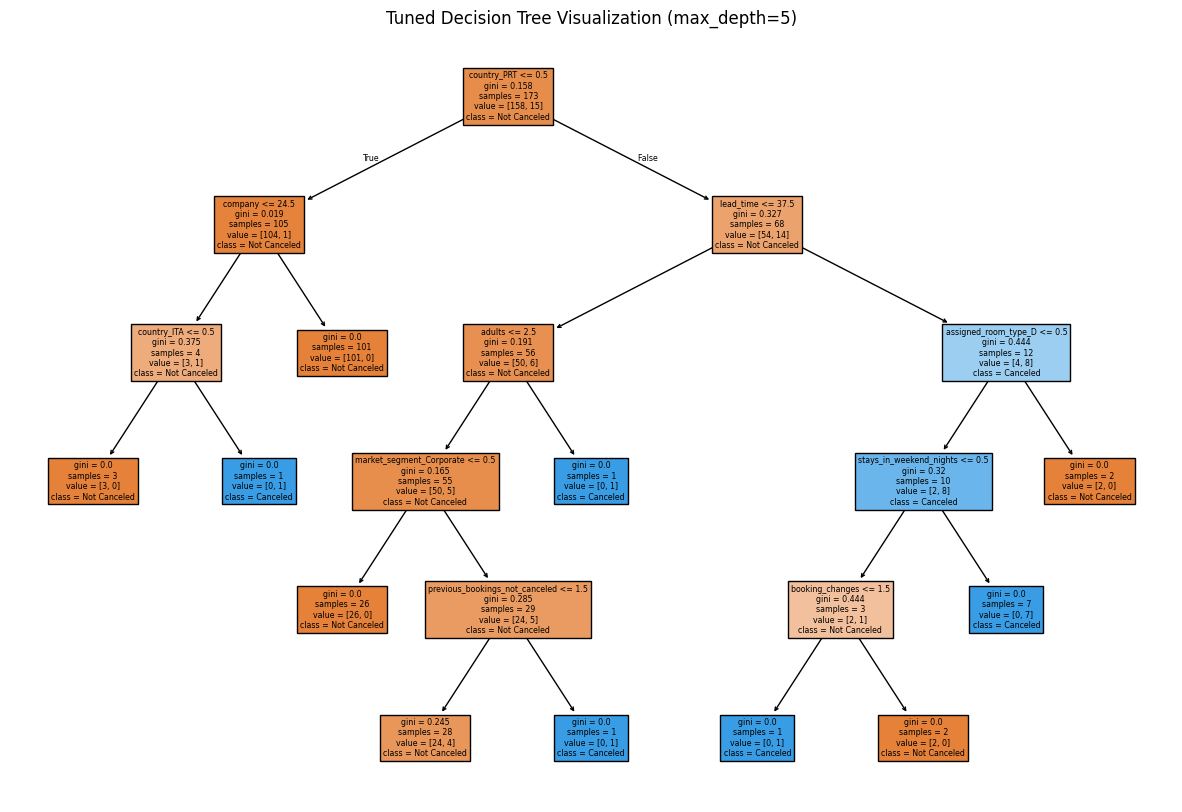

Tuned Confusion Matrix:
[[41  1]
 [ 2  0]]

Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.00      0.00      0.00         2

    accuracy                           0.93        44
   macro avg       0.48      0.49      0.48        44
weighted avg       0.91      0.93      0.92        44



In [ ]:
# 2.5 Control the Tree Size: Parameter Tuning
# Example: limiting the maximum depth of the tree
tuned_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tuned_model.fit(X_train, y_train)

# Visualize the Tuned Model
plt.figure(figsize=(15, 10))
plot_tree(tuned_model, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'], filled=True)
plt.title('Tuned Decision Tree Visualization (max_depth=5)')
plt.show()

# Evaluate the tuned model
y_pred_tuned = tuned_model.predict(X_test)
print("Tuned Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# SVM


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
path = 'Desktop/econ3105/lab1/hotel_bookings.csv'
data = pd.read_csv(path)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/econ3105/lab1/hotel_bookings.csv'

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=data.columns)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
x1 = data['previous_cancellations']
x2 = data['is_repeated_guest']
y = data['is_canceled']
print(y.unique())
y = y.astype(int)
print(x1.unique())
print(x2.unique())
x1 = x1.astype(int)
x2 = x2.astype(int)

[0 1]
[0 1 2 3 26 25 14 4 24 19 5 21 6 13 11]
[0 1]


In [ ]:
X = pd.DataFrame({'previous_cancellations': x1, 'is_repeated_guest': x2})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled  = scaler.transform(X_test)

display(X_train_scaled.shape, X_test_scaled.shape)   # 2d arrays without name

(95512, 2)

(23878, 2)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range2 = {'C': [0.01, 0.1, 1, 10, 100], 'degree': [2,3,4]}

poly = SVC(kernel='poly')

grid2 = GridSearchCV(estimator = poly, param_grid = param_range2, cv = 2)

X_sample = X_train_scaled[:1000]  # use first 1000 samples
y_sample = y_train[:1000]
grid2.fit(X_sample, y_sample)

print("Best Params:{}".format(grid2.best_params_))  # best c and degree values found in cross validation
print("Mean cv score of the best Params: {:.2%}".format(grid2.best_score_))

Best Params:{'C': 0.01, 'degree': 2}
Mean cv score of the best Params: 62.30%


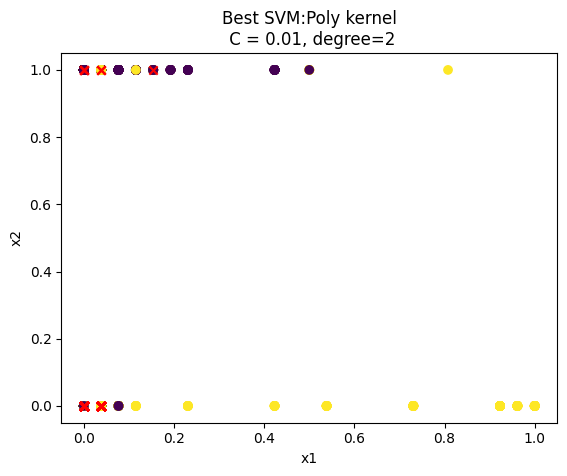

In [ ]:
#plot
poly_best = grid2.best_estimator_   # get the best model
SV = poly_best.support_vectors_     # get features of the support vectors
params = poly_best.get_params()     # get paramter of the best model

plt.scatter(x = X_train_scaled[:,0], y = X_train_scaled[:,1], c = y_train)
plt.scatter(SV[:,0], SV[:,1], c = 'red', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Best SVM:Poly kernel\n C = {}, degree={}".format(params['C'],params['degree']));  # \n means break the line

# Logistic Regression


In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # suppress future warnings (about pandas.replace)

In [ ]:
# Step 1: Load the data
from google.colab import drive
path = '/content/hotel_bookings.csv'
data = pd.read_csv(path)

# Print the columns to check their names
print("Columns in the DataFrame:", data.columns.tolist())

FileNotFoundError: [Errno 2] No such file or directory: '/content/hotel_bookings.csv'

In [ ]:
# Step 2: Convert Non-Numeric Features to Numeric
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoders = {}

# Convert each categorical column to numeric
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string to avoid errors
    label_encoders[col] = le  # Store the encoder for future use if needed

In [ ]:
# Step 3: Define Features and Target Variable
X = data.drop('is_canceled', axis=1)  # Features
y = data['is_canceled']  # Target variable

# Map the target variable to string labels
y = y.map({0: 'Not Canceled', 1: 'Canceled'})

In [ ]:
# Step 4: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Scale Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the available feature names after scaling
print("Columns in X after preprocessing:", X.columns.tolist())

Columns in X after preprocessing: ['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# Step 6: Train Model m1 with Only Two Features
# Selecting two features for the model (you can choose based on domain knowledge or feature importance)
selected_features = ['lead_time', 'adr']  # Example selected features
X_train_m1 = X_train_scaled[:, [X.columns.get_loc(f) for f in selected_features]]
X_test_m1 = X_test_scaled[:, [X.columns.get_loc(f) for f in selected_features]]

In [ ]:
# Step 6.1: Model Training for m1
model_m1 = LogisticRegression(max_iter=1000)
model_m1.fit(X_train_m1, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 6.2: Predict and Evaluate on Train Set for m1
y_train_pred_m1 = model_m1.predict(X_train_m1)
train_accuracy_m1 = accuracy_score(y_train, y_train_pred_m1)
train_report_m1 = classification_report(y_train, y_train_pred_m1)

print(f'Model m1 (Two Features) - Train Accuracy: {train_accuracy_m1:.2f}')
print('Train Classification Report for m1:\n', train_report_m1)

Model m1 (Two Features) - Train Accuracy: 0.66
Train Classification Report for m1:
               precision    recall  f1-score   support

    Canceled       0.59      0.28      0.38     35253
Not Canceled       0.68      0.88      0.77     60259

    accuracy                           0.66     95512
   macro avg       0.63      0.58      0.58     95512
weighted avg       0.65      0.66      0.63     95512



In [ ]:
# Step 6.3: Log-Odds and Positive Probabilities for m1
log_odds_m1 = model_m1.predict_log_proba(X_train_m1)[:, 1]
positive_probabilities_m1 = model_m1.predict_proba(X_train_m1)[:, 1]

print('Log-Odds for Train Set of m1:', log_odds_m1)
print('Positive Probabilities for Train Set of m1:', positive_probabilities_m1)

Log-Odds for Train Set of m1: [-0.42849676 -0.34439269 -0.36644512 ... -0.38360823 -0.52356913
 -0.30078668]
Positive Probabilities for Train Set of m1: [0.6514877  0.7086506  0.69319418 ... 0.68139833 0.59240241 0.74023566]


In [ ]:
# Step 6.4: Predict and Evaluate on Test Set for m1
y_test_pred_m1 = model_m1.predict(X_test_m1)
test_accuracy_m1 = accuracy_score(y_test, y_test_pred_m1)
test_report_m1 = classification_report(y_test, y_test_pred_m1)

print(f'Model m1 (Two Features) - Test Accuracy: {test_accuracy_m1:.2f}')
print('Test Classification Report for m1:\n', test_report_m1)

Model m1 (Two Features) - Test Accuracy: 0.66
Test Classification Report for m1:
               precision    recall  f1-score   support

    Canceled       0.59      0.28      0.38      8971
Not Canceled       0.67      0.88      0.76     14907

    accuracy                           0.66     23878
   macro avg       0.63      0.58      0.57     23878
weighted avg       0.64      0.66      0.62     23878



In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.fit_transform(X_test_scaled)

In [ ]:
# Step 7: Train Model m2 with All Features
model_m2 = LogisticRegression(max_iter=1000)
model_m2.fit(X_train_imputed, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 7.1: Predict and Evaluate on Train Set for m2
y_train_pred_m2 = model_m2.predict(X_train_imputed)
train_accuracy_m2 = accuracy_score(y_train, y_train_pred_m2)
train_report_m2 = classification_report(y_train, y_train_pred_m2)

print(f'Model m2 (All Features) - Train Accuracy: {train_accuracy_m2:.2f}')
print('Train Classification Report for m2:\n', train_report_m2)

Model m2 (All Features) - Train Accuracy: 0.99
Train Classification Report for m2:
               precision    recall  f1-score   support

    Canceled       1.00      0.97      0.99     35253
Not Canceled       0.98      1.00      0.99     60259

    accuracy                           0.99     95512
   macro avg       0.99      0.99      0.99     95512
weighted avg       0.99      0.99      0.99     95512



In [ ]:
# Step 7.2: Predict and Evaluate on Test Set for m2
y_test_pred_m2 = model_m2.predict(X_test_imputed)
test_accuracy_m2 = accuracy_score(y_test, y_test_pred_m2)
test_report_m2 = classification_report(y_test, y_test_pred_m2)

print(f'Model m2 (All Features) - Test Accuracy: {test_accuracy_m2:.2f}')
print('Test Classification Report for m2:\n', test_report_m2)

Model m2 (All Features) - Test Accuracy: 0.99
Test Classification Report for m2:
               precision    recall  f1-score   support

    Canceled       1.00      0.97      0.99      8971
Not Canceled       0.98      1.00      0.99     14907

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



# KNN

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('Downloads/hotel_bookings.csv')    # change separator as " " (default ‘,’)

display(df.head(), df.shape, df.columns, df.dtypes)

In [ ]:
df = data.copy()

In [ ]:
# filling null values with zero

df.fillna(0, inplace = True)

In [ ]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

<ipython-input-11-59d2b98aa8f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
<ipython-input-11-59d2b98aa8f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['year'] = cat_df['reservation_status_date'].dt.year
<ipython-input-11-59d2b98aa8f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

<ipython-input-12-243e1afe9ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)


In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [ ]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

<ipython-input-15-37f7ef0a109b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
<ipython-input-15-37f7ef0a109b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
<ipython-input-15-37f7ef0a109b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [ ]:
num_df.var()

,0
lead_time,11422.361808
arrival_date_week_number,184.990111
arrival_date_day_of_month,77.107192
stays_in_weekend_nights,0.990258
stays_in_week_nights,3.599010
adults,0.330838
children,0.159070
babies,0.009508
is_repeated_guest,0.030507
previous_cancellations,0.713887


In [ ]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
num_df.var()

,0
lead_time,2.582757
arrival_date_week_number,0.440884
arrival_date_day_of_month,0.506325
stays_in_weekend_nights,0.990258
stays_in_week_nights,3.599010
adults,0.330838
children,0.159070
babies,0.009508
is_repeated_guest,0.030507
previous_cancellations,0.713887


In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [ ]:
X.shape, y.shape

((119210, 26), (119210,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

k_range = {'n_neighbors': np.arange(1,20)}                            #  k = 1,2 ... 84, why?

grid = GridSearchCV(estimator = knn, param_grid = k_range, cv = 5)    # 5-CV on train (105 - sub_train 84 + validation 21)

grid.fit(X_train, y_train)      # search over the values on Train data (with 5-cv)

best_param = grid.best_params_         # k value that returns highest mean cv score during cv
best_cv_score = grid.best_score_          # mean cv score of the best k

print("Best Params: {}".format(best_param))
print("Mean cv score of the best k: {:.2%}".format(best_cv_score))

In [ ]:
import matplotlib.pyplot as plt
k_values = grid.cv_results_['param_n_neighbors']        # k values, same as k_values = k_range['n_neighbors']
cv_scores = grid.cv_results_['mean_test_score']         # mean cv scores for each k

plt.figure(figsize = (8, 5))
plt.plot(k_values,  cv_scores)        # a line plot
plt.xlabel('No. of Neighbors (k values)')
plt.ylabel('Mean CV Score')
plt.title('k-NN: Best k = {} & Mean CV Score : {:.2%}'.format(best_param['n_neighbors'], best_cv_score));

# Compare

  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: contourpy
    Found existing installation: contourpy 1.3.1
    Uninstalling contourpy-1.3.1:
      Successfully uninstalled contourpy-1.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.1 requires numpy>=1.23.5, but you have numpy 1.22.4 which is incompatible.
plotnine 0.14.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.


In [ ]:
#Confusion Matrix

#Linear Regression
from scipy.interpolate import interp1d
from scikitplot.metrics import plot_confusion_matrix

test_pred_classes = np.round(test_pred1) #round to 0, 1, 2

plot_confusion_matrix(y_true = y_test,
                      y_pred = test_pred_classes);

plt.xticks([0, 1, 2], ['Check-Out', 'Canceled', 'No-Show'])
plt.yticks([0, 1, 2], ['Check-Out', 'Canceled', 'No-Show'])
plt.title('Linear regression')
plt.show()

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [ ]:
#Decision Tree
plt.figure(figsize=(10, 8))
plot_confusion_matrix(y_test, y_pred_tuned)
plt.title('Confusion Matrix - Tuned Model (max_depth=5)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.yticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

NameError: name 'plt' is not defined